In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Table of Contents

1. [Title:San Francisco Housing Rental Analysis](#san-francisco-housing-rental-analysis)
   - [CRISP-DM](#crisp-dm)
      - [1. Business Understanding](#1-business-understanding)
         - [1.1 Business Understanding Overview](#11-business-understanding-overview)
         - [1.2 Project Goal](#12-project-goal)
         - [1.3 Key Questions](#13-key-questions)
         - [1.4 Data Sources](#14-data-sources)
         - [1.5 Analysis Approach](#15-analysis-approach)
         - [1.6 Expected Outcomes](#16-expected-outcomes)
         - [1.7 Stakeholders](#17-stakeholders)
      - [2. Data Understanding](#2-data-understanding)
         - [2.1 Load Data](#21-load-data)
         - [2.2 Features Explanation](#22-features-explanation)
         - [2.3 Data Overview](#23-data-overview)
         - [2.4 Data Findings](#24-data-findings)
      - [3. Data Preparation (Cleaning) for Visualization](#3-data-preparation-cleaning-for-visualization)
         - [3.1 Removing Unnecessary Features](#31-removing-unnecessary-features)
         - [3.2 Handling Missing Values](#32-handling-missing-values)
         - [3.3 Checking Duplicate Rows](#33-checking-duplicate-rows)
         - [3.4 Converting Column Names to Lowercase](#34-converting-column-names-to-lowercase)
         - [3.5 Checking for Outliers](#35-checking-for-outliers)
      - [4. Data Visualization](#4-data-visualization)
         - [4.1 Calculate the Mean Number of Housing Units per Year](#41-calculate-the-mean-number-of-housing-units-per-year)
         - [4.2 Calculate the Average Gross Rent per Year](#42-calculate-the-average-gross-rent-per-year)
         - [4.3 Calculate the Average Sales Price per Year](#43-calculate-the-average-sales-price-per-year)
         - [4.4 The Top 10 Most Expensive Neighborhoods](#44-the-top-10-most-expensive-neighborhoods)
         - [4.5 Parallel Coordinates and Parallel Categories Analysis](#45-parallel-coordinates-and-parallel-categories-analysis)
            - [4.5.a. Create a Parallel Coordinates Plot](#45a-create-a-parallel-coordinates-plot)
            - [4.5.b. Create a Parallel Categories Plot](#45b-create-a-parallel-categories-plot)
         - [4.6 Neighborhood Map](#46-neighborhood-map)
            - [4.6.1 Load and Inspect Location Data](#461-load-and-inspect-location-data)
            - [4.6.2 Data Preparation](#462-data-preparation)
            - [4.6.3 Folium Map Centered Around San Francisco](#463-folium-map-centered-around-san-francisco)
   - [Dashboard using Plotly](#dashboard-using-plotly)



# Title : San Francisco Housing Rental Analysis



In [2]:
# Install the necessary libraries with specific versions
!pip install --ignore-installed blinker
!pip install pandas numpy matplotlib seaborn panel hvplot plotly
!pip install python-dotenv
!pip install folium
!pip install dash jupyter-dash

# Install additional dependencies for Dash and Panel
!pip install dash-bootstrap-components dash-core-components dash-html-components

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.0/161.0 kB 8.7 MB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 40.2 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 8.5 MB/s eta 0:00:00


In [3]:
# Importing libraries after installation
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import panel as pn
import hvplot.pandas
import plotly.express as px
import plotly.graph_objects as go
from pathlib import Path
from dotenv import load_dotenv

# Initialize the Panel Extensions (for Plotly)
pn.extension('plotly')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=Warning)

import folium
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from jupyter_dash import JupyterDash

<ipython-input-3-372bb42bf3ab>:15: UserWarning: Using Panel interactively in Colab notebooks requires the jupyter_bokeh package to be installed. Install it with:

    !pip install jupyter_bokeh

and try again.
  pn.extension('plotly')


# CRISP-DM
We will follow this model for our project. The CRoss Industry Standard Process for Data Mining (CRISP-DM) is a process model that serves as the base for a data science process. It has six sequential phases:

- **Business understanding**– What does the business need?
- **Data understanding** – What data do we have / need? Is it clean?
- **Data preparation** – How do we organize the data for modeling?
- **Modeling** – What modeling techniques should we apply?
- **Evaluation** – Which model best meets the business objectives?
- **Deployment** – How do stakeholders access the results?


For our project, our primary focus will be on cleaning, analyzing, and visualizing data, corresponding to the **first three stages** of the CRISP-DM model.

##1.Business understanding

First we will discuss the comprehensive overview for the "Business Understanding" section based on our project:

###1.1Business Understanding Overview

The "Business Understanding" phase of the CRISP-DM model for our project centers around gaining a deep comprehension of the San Francisco housing market. Our primary objective is to provide valuable insights to potential real estate investors, enabling them to make well-informed decisions when choosing rental investment properties.

###1.2Project Goal

The overarching goal is to empower investors by offering a detailed analysis of the San Francisco housing landscape. We aim to unravel crucial patterns, trends, and key indicators that influence the rental market, focusing on three pivotal aspects: sale prices per square foot, housing unit dynamics, and gross rent across various neighborhoods in San Francisco.



###1.3Key Questions

To guide our analysis effectively, we have formulated key questions such as:

1. What are the trends in sale prices per square foot over the analyzed period?
2. How have housing units fluctuated in different neighborhoods?
3. What insights can be derived from the variations in gross rent?

###1.4Data Sources

Our analysis is grounded in census data, specifically the "sfo_neighborhoods_census_data.csv" file. This dataset serves as the primary source of information, containing valuable metrics spanning multiple years, neighborhoods, and crucial housing market indicators.



###1.5Analysis Approach

We plan to leverage exploratory data analysis techniques to uncover underlying patterns within the data. Visualization tools will play a vital role in providing a clear representation of trends over time and variations across neighborhoods.



###1.6Expected Outcomes

The anticipated outcomes include a comprehensive understanding of the San Francisco housing market dynamics, identifying neighborhoods with potential investment opportunities, and offering data-driven insights that investors can use to make informed decisions.



###1.7Stakeholders

Stakeholders for this project include potential real estate investors seeking to enter or expand their presence in the San Francisco rental market. By addressing their information needs through our analysis, we aim to contribute to their decision-making process.

## 2.Data understanding

###2.1.Load Data

In [4]:
# Read the census data into a Pandas DataFrame
file_path = Path("/content/drive/MyDrive/Colab Notebooks/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path)
sfo_data.head()

,Unnamed: 0,Year,Neighborhood,Sale_price_sqr_foot,Housing_units,Gross_rent
0,0,2010,Alamo Square,291.182945,372560,1239
1,1,2010,Anza Vista,267.932583,372560,1239
2,2,2010,Bayview,170.098665,372560,1239
3,3,2010,Buena Vista Park,347.394919,372560,1239
4,4,2010,Central Richmond,319.027623,372560,1239


###2.2.Features explanation
`sfo_data` is a DataFrame that represents data related to the San Francisco housing market. The features in this DataFrame are as follows:

- **Year:** The year in which the data was recorded.
- **Neighborhood:** The name of the neighborhood in San Francisco.
- **Sale_price_sqr_foot:** The average sale price per square foot for properties in the given neighborhood.
- **Housing_units:** The number of housing units in the given neighborhood.
- **Gross_rent:** The average gross rent (rent before taxes) for properties in the given neighborhood.

###2.3.Data overview

In [5]:
# To find out the information for our features
sfo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           402 non-null    int64  
 1   Year                 402 non-null    int64  
 2   Neighborhood         402 non-null    object 
 3   Sale_price_sqr_foot  397 non-null    float64
 4   Housing_units        402 non-null    int64  
 5   Gross_rent           402 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 19.0+ KB


In [6]:
# To get the number of rows and column
sfo_data.shape

(402, 6)

In [7]:
# for unique neighborhoods count
unique_neighborhoods_count = sfo_data['Neighborhood'].nunique()
print("Number of unique neighborhoods:", unique_neighborhoods_count)

Number of unique neighborhoods: 73


In [8]:
# To Determine the time span covered by the provided dataset.
unique_years = sfo_data['Year'].unique()
print("Unique years:")
for year in unique_years:
    print(year)

Unique years:
2010
2011
2012
2013
2014
2015
2016


In [9]:
# To find out the summary statistics for our numeriacal features
sfo_data.describe()

,Unnamed: 0,Year,Sale_price_sqr_foot,Housing_units,Gross_rent
count,402.000000,402.000000,397.000000,402.000000,402.000000
mean,200.500000,2012.865672,498.074582,378139.462687,2746.733831
std,116.191652,1.977899,253.619572,3850.969847,1075.701080
min,0.000000,2010.000000,40.772625,372560.000000,1239.000000
25%,100.250000,2011.000000,333.126774,374507.000000,1530.000000
50%,200.500000,2013.000000,442.242657,378401.000000,2971.000000
75%,300.750000,2015.000000,597.200528,382295.000000,3739.000000
max,401.000000,2016.000000,2258.702832,384242.000000,4390.000000


###2.4.Data findings
1. The dataset contains information for the years 2010 to 2016, with a total of 402 entries.
2. There are 73 unique neighborhoods present in the dataset.
3. The 'Unnamed: 0' column appears to be unnecessary and can be considered for removal.
4. The 'Sale_price_sqr_foot' column has 397 non-null entries, indicating some missing values.
5. The average housing units across the dataset is approximately 378,139.
6. The average gross rent is approximately 2,746, and the sale price per square foot averages around 498.
7. The minimum sale price per square foot is 40.77, while the maximum reaches 2,258.70.


## 3.Data preparation(cleaning) for visualization

###3.1.Removing un-necessary features

In [10]:
sfo_data = sfo_data.drop("Unnamed: 0", axis=1)
sfo_data.head()

,Year,Neighborhood,Sale_price_sqr_foot,Housing_units,Gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


###3.2.Handling the missing values
- As there are only 5 missing rows present so we can remove these rows rather imputing them because it will not impact our data analysis significantly. We can impute them with mean `Sale_price_sqr_foot` as well.

In [11]:
# Check for missing values in the DataFrame
sfo_data.isnull().sum()

,0
Year,0
Neighborhood,0
Sale_price_sqr_foot,5
Housing_units,0
Gross_rent,0


In [12]:
# Remove rows with missing values and confirm again
sfo_data=sfo_data.dropna()
sfo_data.isnull().sum()

,0
Year,0
Neighborhood,0
Sale_price_sqr_foot,0
Housing_units,0
Gross_rent,0


In [13]:
sfo_data.shape

(397, 5)

###3.3.Checking duplicate rows

In [14]:
# Check if there are any duplicate rows in the DataFrame
are_there_duplicates = sfo_data.duplicated().any()

# Display the result
if are_there_duplicates:
    print("There are duplicated rows in the DataFrame.")
else:
    print("There are no duplicated rows in the DataFrame.")

There are duplicated rows in the DataFrame.


In [15]:
# Find and display duplicated rows in the DataFrame
duplicated_rows = sfo_data[sfo_data.duplicated(keep=False)]
print("Duplicated Rows:")
display(duplicated_rows)

Duplicated Rows:


,Year,Neighborhood,Sale_price_sqr_foot,Housing_units,Gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
397,2010,Alamo Square,291.182945,372560,1239
398,2010,Anza Vista,267.932583,372560,1239
399,2010,Bayview,170.098665,372560,1239
400,2010,Buena Vista Park,347.394919,372560,1239
401,2010,Central Richmond,319.027623,372560,1239


In [16]:
# Remove duplicated rows, keeping the first instance
sfo_data = sfo_data.drop_duplicates(keep='first')

# Display the DataFrame without duplicates
print("DataFrame without Duplicates:")
display(sfo_data)

DataFrame without Duplicates:


,Year,Neighborhood,Sale_price_sqr_foot,Housing_units,Gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239
...,...,...,...,...,...
392,2016,Telegraph Hill,903.049771,384242,4390
393,2016,Twin Peaks,970.085470,384242,4390
394,2016,Van Ness/ Civic Center,552.602567,384242,4390
395,2016,Visitacion Valley,328.319007,384242,4390


###3.4.Converting column names to lowercase
- It is good practice to convert the column names from upper case to lowercase for code feasibility.

In [17]:
# Convert column names to lowercase
sfo_data.columns = sfo_data.columns.str.lower()

# Display the first few rows of the DataFrame with lowercase column names
print("DataFrame with lowercase column names:")
display(sfo_data.head())

DataFrame with lowercase column names:


,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


###3.5.Checking for outliers

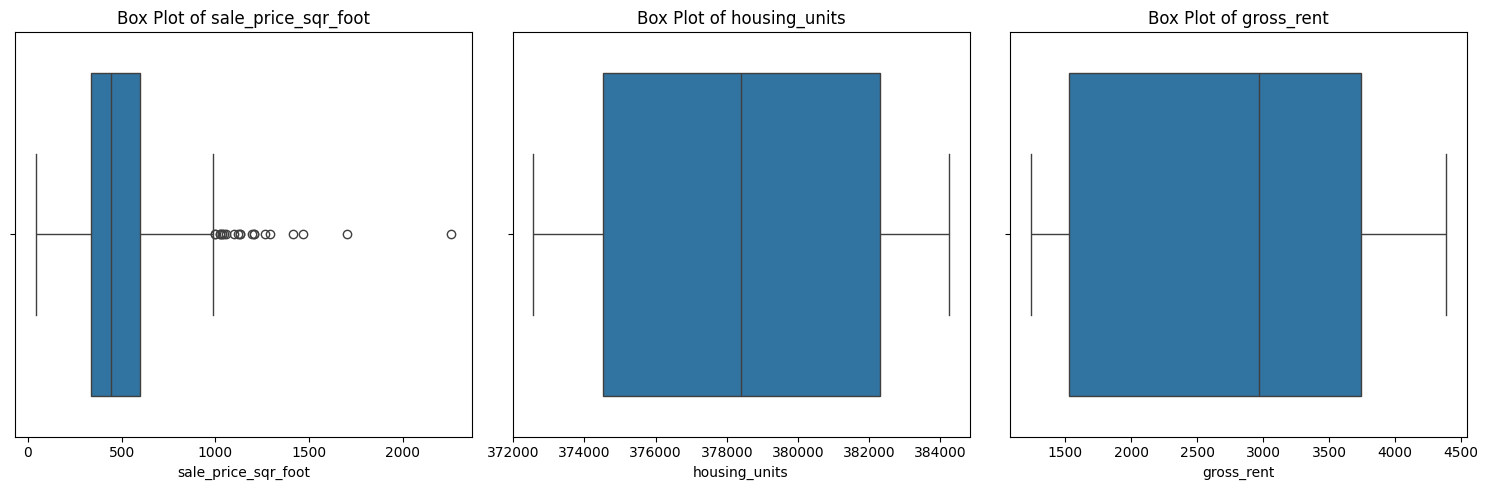

In [18]:
# Select the columns for which you want to check for outliers
columns_of_interest = ['sale_price_sqr_foot', 'housing_units', 'gross_rent']

# Create subplots for side-by-side box plots
fig, axes = plt.subplots(nrows=1, ncols=len(columns_of_interest), figsize=(15, 5))

# Check for and visualize outliers using box plots
for i, column in enumerate(columns_of_interest):
    # Box plot
    sns.boxplot(x=sfo_data[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')

plt.tight_layout()
plt.show()

- There are outliers observed in the 'sale_price_sqr_foot' column; however, it is deemed crucial to retain them as they contribute significant data. Eliminating these outliers could potentially distort the final analysis findings and the accuracy of visualizations. Therefore, for the current analysis, these outliers will be retained.

##4.Data visualization

###4.1.calculate the mean number of housing units per year

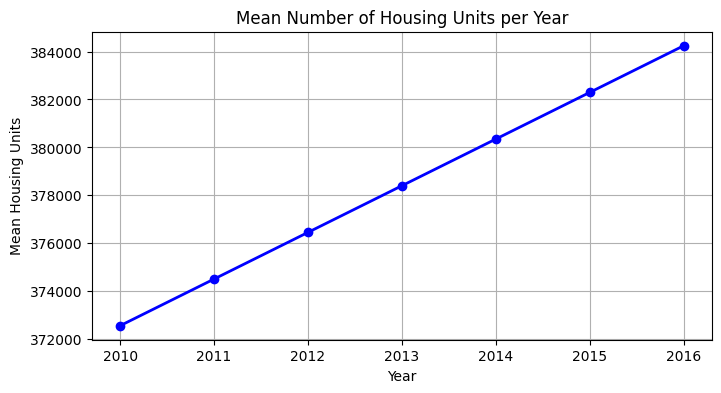

In [19]:
# To calculate the mean number of housing units per year
mean_housing_units = sfo_data.groupby("year")["housing_units"].mean()

# Create a line chart
plt.figure(figsize=(8,4))
mean_housing_units.plot(kind='line', marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Mean Number of Housing Units per Year')
plt.xlabel('Year')
plt.ylabel('Mean Housing Units')
plt.grid(True)
plt.show()

In [20]:
mean_housing_units

,housing_units
year,
2010,372560.0
2011,374507.0
2012,376454.0
2013,378401.0
2014,380348.0
2015,382295.0
2016,384242.0


<Axes: title={'center': 'Average Housing Units Per Year'}, xlabel='year'>

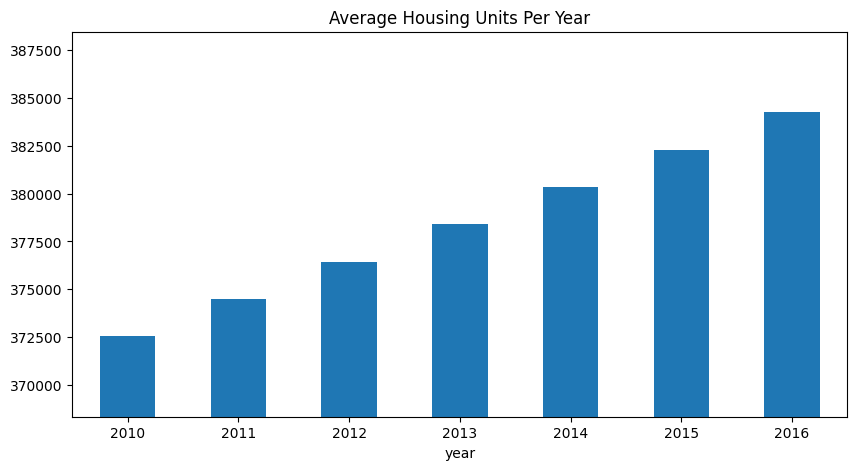

In [21]:
# Same visualization using bar chart
min = mean_housing_units.min()
max = mean_housing_units.max()
std = mean_housing_units.std()
mean_housing_units.plot.bar(ylim = (min - std, max + std), title = "Average Housing Units Per Year", rot= 0, figsize =(10,5))

###4.2.calculate the average gross rent per year

<Axes: title={'center': 'Average Gross Rent Per Year'}, xlabel='year'>

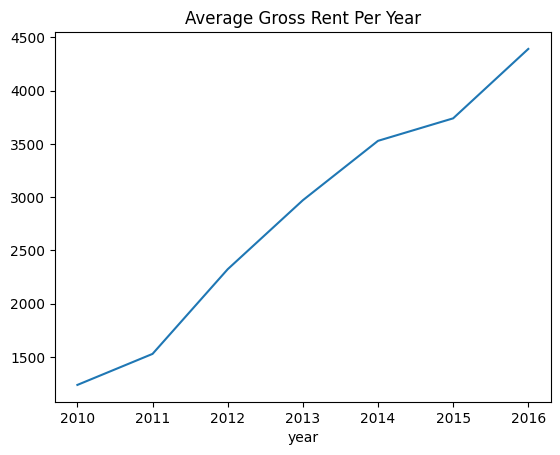

In [22]:
# To calculate the average gross rent per year
avg_gross_rent = sfo_data.groupby("year")["gross_rent"].mean()
avg_gross_rent.plot.line(title = "Average Gross Rent Per Year")

###4.3.calculate the Average Sales Price per Year

<Axes: title={'center': 'Average Sales Price_sqt_foot Per Year'}, xlabel='year'>

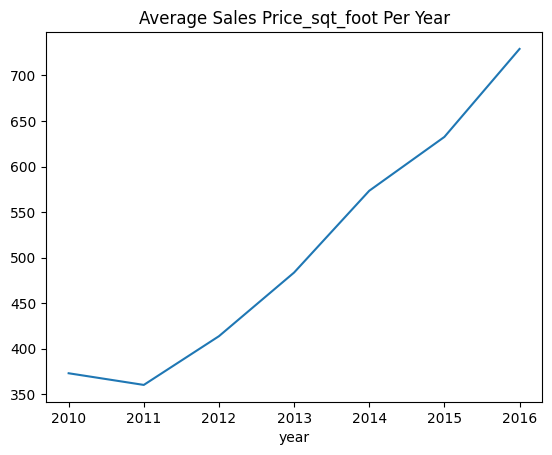

In [23]:
# To calculate and Plot the Average Sales Price per Year as a line chart
avg_sale_price = sfo_data.groupby("year")["sale_price_sqr_foot"].mean()
avg_sale_price.plot.line(title = "Average Sales Price_sqt_foot Per Year")

###4.4.The Top 10 Most Expensive Neighborhoods
Here we calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average.We Plot the results as a bar chart.

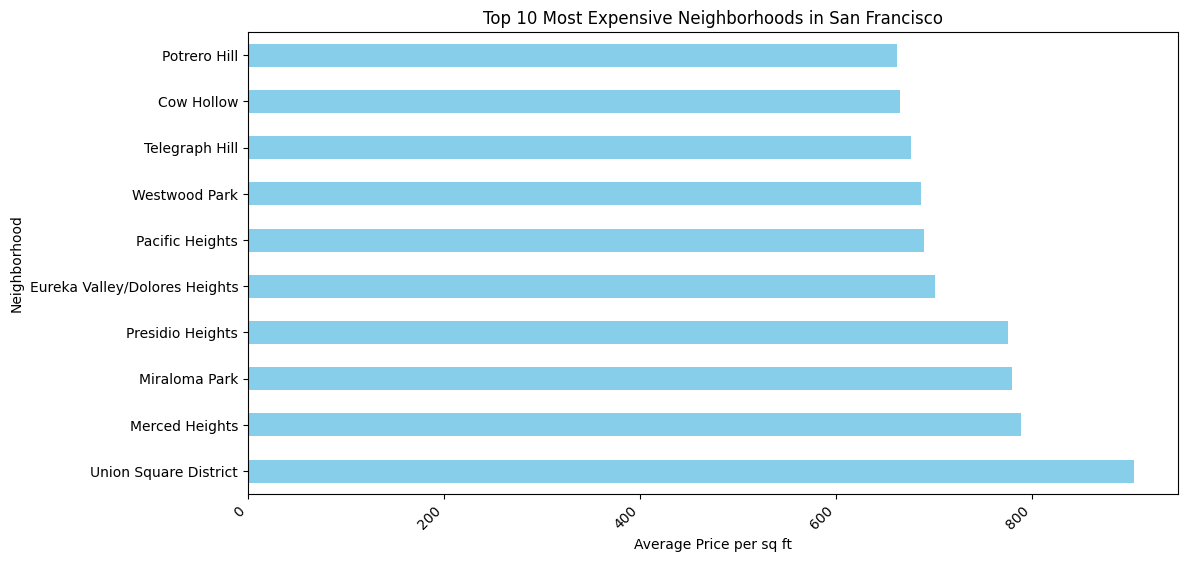

In [24]:
# Group by neighborhood, calculate mean price, and sort in descending order
top_10_neighborhoods = sfo_data.groupby("neighborhood")["sale_price_sqr_foot"].mean().sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 most expensive neighborhoods
plt.figure(figsize=(12, 6))
top_10_neighborhoods.plot(kind='barh', color='skyblue')
plt.title('Top 10 Most Expensive Neighborhoods in San Francisco')
plt.xlabel('Average Price per sq ft')
plt.ylabel('Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.show()

###4.5.Parallel Coordinates and Parallel Categories Analysis
- Now we will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods.For that we will create the DataFrame of Average values per neighborhood and then we will create the following visualizations:

      a. Create a Parallel Coordinates Plot
      b. Create a Parallel Categories Plot

In [25]:
# Group by year and neighborhood and then create a new dataframe of the mean values
avg_price_by_neighborhood = sfo_data.groupby(["year", "neighborhood"]).mean()
avg_price_by_neighborhood.reset_index(inplace=True)
avg_price_by_neighborhood.rename(columns={"level_0": "year"}, inplace=True)
# Getting the data from the top 10 expensive neighborhoods
mean_sale_price = sfo_data.groupby(["neighborhood"]).mean().sort_values('sale_price_sqr_foot', ascending=False).dropna().reset_index().round(2)
top_ten = mean_sale_price.iloc[:10]

####4.5.a. Create a Parallel Coordinates Plot

In [26]:
# Parallel Coordinates Plot
px.parallel_coordinates(top_ten, color='sale_price_sqr_foot',
                        dimensions=['sale_price_sqr_foot', 'housing_units', 'gross_rent'],
                        color_continuous_scale=px.colors.sequential.Inferno,
                        labels={"sale_price_sqr_foot":"Sale Price per SqFt",
                               "housing_units":"Housing Units",
                               "gross_rent":"Gross Rent"}
                       )

####4.5.b. Create a Parallel Categories Plot

In [27]:
# Parallel Categories Plot
px.parallel_categories(top_ten, color='sale_price_sqr_foot',
                        dimensions=['neighborhood','sale_price_sqr_foot', 'housing_units', 'gross_rent'],
                        color_continuous_scale=px.colors.sequential.Inferno,
                        labels={"neighborhood": "Neighborhood",
                               "sale_price_sqr_foot":"Sale Price per SqFt",
                               "housing_units":"Housing Units",
                               "gross_rent":"Gross Rent"}
                       )

###4.6.Neighborhood Map

Here we will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization.

####4.6.1.Load and inspect Location Data

In [28]:
# Load neighborhoods coordinates data
file_path = Path("/content/drive/MyDrive/Colab Notebooks/CLIENTS/marcel_brack/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


In [29]:
df_neighborhood_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Neighborhood  73 non-null     object 
 1   Lat           73 non-null     float64
 2   Lon           73 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.8+ KB


In [30]:
df_neighborhood_locations.shape

(73, 3)

####4.6.2.Data Preparation

We will join the location data with the mean prices per neighborhood

    1. Calculate the mean values for each neighborhood
    2. Join the average values with the neighborhood locations

In [31]:
# 1.Calculate the mean values for each neighborhood
mean_values = sfo_data.groupby([sfo_data["neighborhood"]]).mean().reset_index()
# 2.Join the average values with the neighborhood locations
combined_df = pd.concat([df_neighborhood_locations, mean_values], axis="columns", join="inner")
avg_values_neighborhood_loc = combined_df.drop(columns='neighborhood')
avg_values_neighborhood_loc

,Neighborhood,Lat,Lon,year,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,2013.000000,366.020712,378401.00,2817.285714
1,Anza Vista,37.779598,-122.443451,2013.333333,373.382198,379050.00,3031.833333
2,Bayview,37.734670,-122.401060,2012.000000,204.588623,376454.00,2318.400000
3,Bayview Heights,37.728740,-122.410980,2015.000000,590.792839,382295.00,3739.000000
4,Bernal Heights,37.728630,-122.443050,2013.500000,576.746488,379374.50,3080.333333
...,...,...,...,...,...,...,...
68,West Portal,37.740260,-122.463880,2012.250000,498.488485,376940.75,2515.500000
69,Western Addition,37.792980,-122.435790,2012.500000,343.490390,377427.50,2555.166667
70,Westwood Highlands,37.734700,-122.456854,2012.000000,533.703935,376454.00,2250.500000
71,Westwood Park,37.734150,-122.457000,2015.000000,687.087575,382295.00,3959.000000


####4.6.3.Folium map centered around San Francisco

In [32]:
# Create a Folium map centered around San Francisco
sf_map = folium.Map(location=[37.7749, -122.4194], zoom_start=12)

# Add markers for each neighborhood with popup information
for index, row in avg_values_neighborhood_loc.iterrows():
    popup_text = f"Neighborhood: {row['Neighborhood']}<br>" \
                 f"Average Price per sq ft: ${row['sale_price_sqr_foot']:.2f}<br>" \
                 f"Housing Units: {row['housing_units']}<br>" \
                 f"Gross Rent: ${row['gross_rent']:.2f}"

    folium.CircleMarker(
        location=[row['Lat'], row['Lon']],
        radius=row['sale_price_sqr_foot'] / 25,
        popup=popup_text,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7
    ).add_to(sf_map)

# Display the map
sf_map

#Dashboard using plotly

In [33]:
# Define the app
app = JupyterDash(__name__)

# Panel Visualization Functions
def housing_units_per_year():
    mean_housing_units = sfo_data.groupby("year")["housing_units"].mean()
    min_val, max_val, std_val = mean_housing_units.min(), mean_housing_units.max(), mean_housing_units.std()

    fig = px.bar(x=mean_housing_units.index, y=mean_housing_units,
                 labels={'x': 'Year', 'y': 'Average Housing Units'},
                 title="Average Housing Units Per Year",
                 height=400)

    fig.update_yaxes(range=[min_val - std_val, max_val + std_val])

    return fig

def average_gross_rent():
    avg_gross_rent = sfo_data.groupby("year")["gross_rent"].mean()

    fig = px.line(x=avg_gross_rent.index, y=avg_gross_rent,
                  labels={'x': 'Year', 'y': 'Average Gross Rent'},
                  title="Average Gross Rent Per Year",
                  height=400)

    return fig

def average_sales_price():
    avg_sale_price = sfo_data.groupby("year")["sale_price_sqr_foot"].mean()

    fig = px.line(x=avg_sale_price.index, y=avg_sale_price,
                  labels={'x': 'Year', 'y': 'Average Sales Price'},
                  title="Average Sales Price Per Year",
                  height=400)

    return fig

def average_price_by_neighborhood():
    neighborhoods = sfo_data['neighborhood'].unique()

    # Initial neighborhood selection
    selected_neighborhood = neighborhoods[0]

    # Dropdown menu for neighborhood selection
    neighborhood_dropdown = dcc.Dropdown(
        id='neighborhood-dropdown',
        options=[{'label': neighborhood, 'value': neighborhood} for neighborhood in neighborhoods],
        value=selected_neighborhood,
        style={'width': '50%'}
    )

    # Initial graph for the first neighborhood
    initial_data = sfo_data[sfo_data['neighborhood'] == selected_neighborhood]
    initial_fig = px.line(initial_data, x='year', y='sale_price_sqr_foot',
                          labels={'sale_price_sqr_foot': 'Average Sale Price per SqFt'},
                          title=f'Average Prices for {selected_neighborhood} Neighborhood',
                          height=400)

    # Update the selected neighborhood based on dropdown value
    @app.callback(
        Output('neighborhood-graph', 'figure'),
        [Input('neighborhood-dropdown', 'value')]
    )
    def update_neighborhood_graph(selected_neighborhood):
        filtered_data = sfo_data[sfo_data['neighborhood'] == selected_neighborhood]
        fig = px.line(filtered_data, x='year', y='sale_price_sqr_foot',
                      labels={'sale_price_sqr_foot': 'Average Sale Price per SqFt'},
                      title=f'Average Prices for {selected_neighborhood} Neighborhood',
                      height=400)
        return fig

    return html.Div([neighborhood_dropdown, dcc.Graph(figure=initial_fig, id='neighborhood-graph')])

def top_most_expensive_neighborhoods():
    mean_sale_price = sfo_data.groupby(["neighborhood"]).mean().sort_values('sale_price_sqr_foot', ascending=False).dropna().reset_index().round(2)
    top_ten = mean_sale_price.iloc[:10]

    fig = px.bar(top_ten, x='neighborhood', y='sale_price_sqr_foot',
                 labels={'sale_price_sqr_foot': 'Avg. Sale Price per SqFt'},
                 title='Top Ten Most Expensive Neighborhoods in San Francisco',
                 height=400)

    return fig

def parallel_coordinates():
    mean_sale_price = sfo_data.groupby(["neighborhood"]).mean().sort_values('sale_price_sqr_foot', ascending=False).dropna().reset_index().round(2)
    top_ten = mean_sale_price.iloc[:10]

    fig = px.parallel_coordinates(top_ten,
                                  color='sale_price_sqr_foot',
                                  dimensions=['sale_price_sqr_foot', 'housing_units', 'gross_rent'],
                                  color_continuous_scale=px.colors.sequential.Inferno,
                                  labels={"sale_price_sqr_foot": "Sale Price per SqFt",
                                          "housing_units": "Housing Units",
                                          "gross_rent": "Gross Rent"},
                                  title="Parallel Coordinates Plot of the Top 10 Most Expensive Neighborhoods",
                                  width=1000)

    return fig

def parallel_categories():
    mean_sale_price = sfo_data.groupby(["neighborhood"]).mean().sort_values('sale_price_sqr_foot', ascending=False).dropna().reset_index().round(2)
    top_ten = mean_sale_price.iloc[:10]

    fig = px.parallel_categories(top_ten,
                                  color='sale_price_sqr_foot',
                                  dimensions=['neighborhood', 'sale_price_sqr_foot', 'housing_units', 'gross_rent'],
                                  color_continuous_scale=px.colors.sequential.Inferno,
                                  labels={"neighborhood": "Neighborhood",
                                          "sale_price_sqr_foot": "Sale Price per SqFt",
                                          "housing_units": "Housing Units",
                                          "gross_rent": "Gross Rent"},
                                  title="Parallel Categories Plot of the Top 10 Most Expensive Neighborhoods",
                                  width=1000)

    return fig

In [34]:
# Define the app layout
app.layout = html.Div([
    html.H1("Real Estate Analysis of San Francisco from 2010-2016 Dashboard"),

    dcc.Tabs([
        dcc.Tab(label='Yearly Market Analysis', children=[
            dcc.Graph(figure=housing_units_per_year(), id='housing-units-per-year'),
            dcc.Graph(figure=average_gross_rent(), id='average-gross-rent'),
            dcc.Graph(figure=average_sales_price(), id='average-sales-price'),
        ]),

        dcc.Tab(label='Neighborhood Analysis', children=[
            average_price_by_neighborhood(),
        ]),

        dcc.Tab(label='Top 10 Most Expensive Neighborhoods', children=[
            dcc.Graph(figure=top_most_expensive_neighborhoods(), id='top-expensive-neighborhoods'),
        ]),

        dcc.Tab(label='Parallel Plots Analysis', children=[
            dcc.Graph(figure=parallel_coordinates(), id='parallel-coordinates'),
            dcc.Graph(figure=parallel_categories(), id='parallel-categories'),
        ]),
    ]),
])

if __name__ == '__main__':
    app.run_server(mode="external")

Dash app running on:
Try `serve_kernel_port_as_iframe` instead. 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>